In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np

In [3]:
DpM_Raw_data=pd.read_csv("Resources/DpM_Data/API_SP.DYN.CDRT.IN_DS2_es_csv_v2_1562579.csv",delimiter=",")

In [4]:
DpM_Raw_data=DpM_Raw_data.set_index("Country Name")

In [5]:
DpM_Mundo=DpM_Raw_data.loc["Mundo"]
#DpM_Mundo_df=DpM_Mundo[["Country Code","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018"]]

In [6]:
DpM_Mundo_df=pd.DataFrame(DpM_Mundo[3:62]).reset_index()

In [7]:
DpM_Mundo_df.shape

(59, 2)

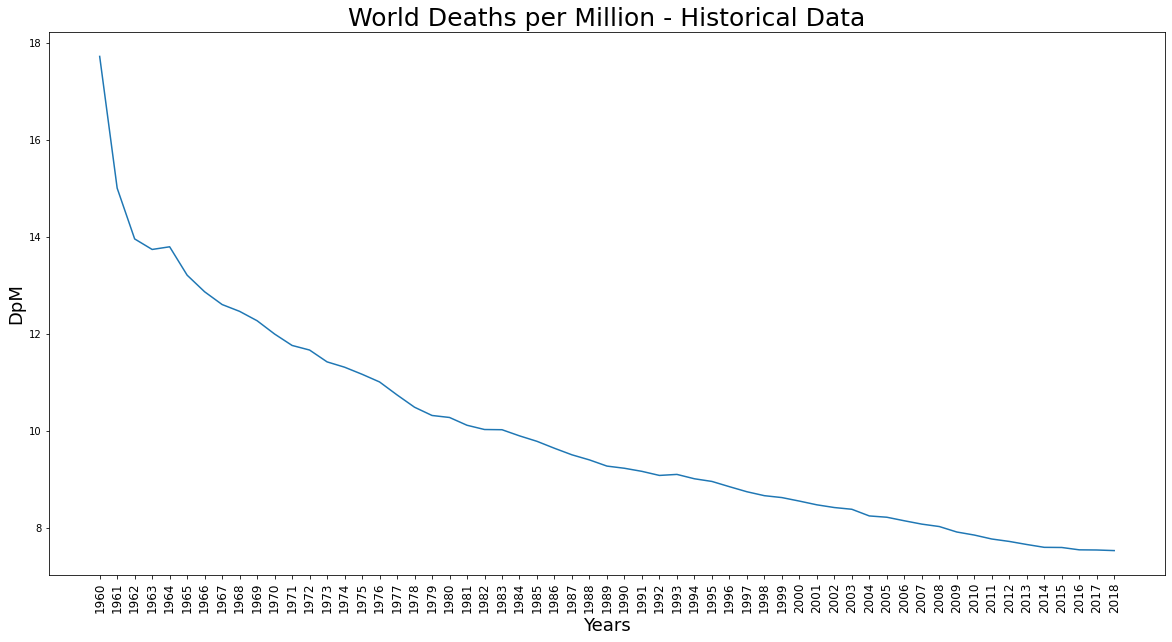

In [8]:
plt.figure(figsize=(20,10))
plt.plot(DpM_Mundo_df["index"],DpM_Mundo_df["Mundo"])
plt.title("World Deaths per Million - Historical Data",fontsize=25)
plt.xlabel("Years",fontsize=18)
plt.ylabel("DpM",fontsize=18)
plt.xticks(rotation="vertical",fontsize=12)
plt.show()

In [9]:
def linear_regression(x,y,title,x_label,y_label):
    from scipy.stats import linregress
    (slope,intercept,rvalue,pvalue,stderr)=linregress(x,y)
    regress_values=x*slope+intercept
    line_eq=f"y = x * {str(round(slope,2))} + {str(round(intercept,2))}" 
    plt.figure(figsize=(20,10))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,xycoords="axes points",xy=(10,10),fontsize=18,color="red")
    print(f"The r-squared is: {rvalue**2}")
    plt.title(title,fontsize=25)
    plt.xlabel(x_label,fontsize=18)
    plt.ylabel(y_label,fontsize=18)
    plt.xticks(x,rotation="vertical",fontsize=12)
    plt.show()
    return slope,intercept

In [10]:
DpM_Mundo_df.dtypes

index    object
Mundo    object
dtype: object

In [11]:
DpM_Mundo_df["index"]=DpM_Mundo_df["index"].astype(float)
DpM_Mundo_df["Mundo"]=DpM_Mundo_df["Mundo"].astype(float)

In [12]:
DpM_Mundo_new=DpM_Mundo_df.loc[DpM_Mundo_df["index"]>=1995]

The r-squared is: 0.9872693885975174


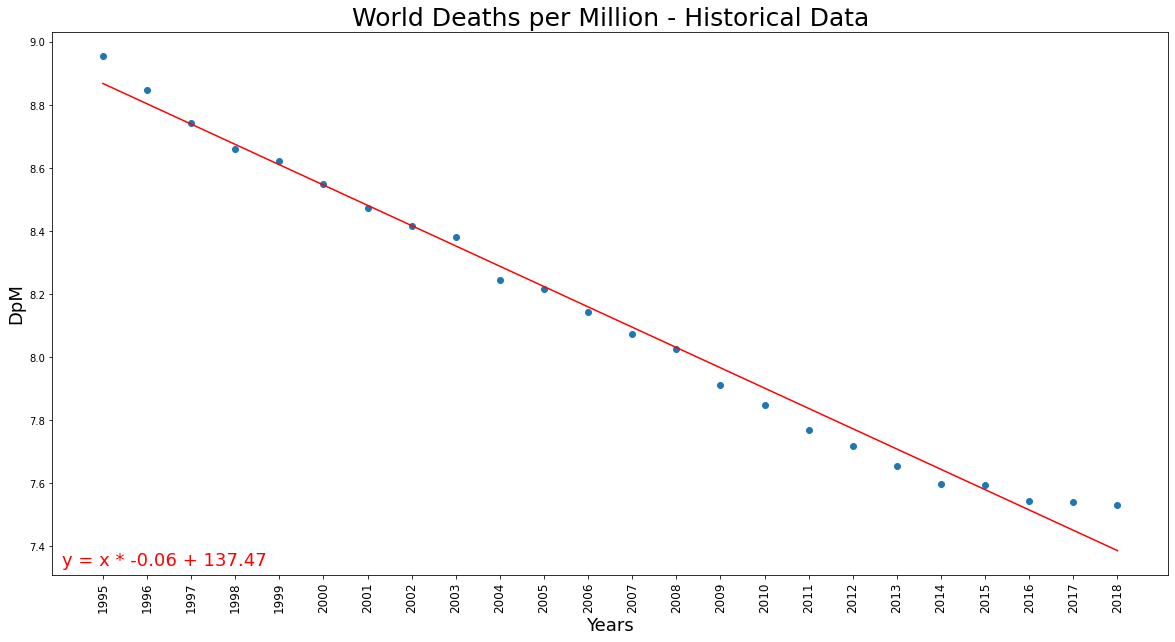

In [13]:
m,b=linear_regression(DpM_Mundo_new["index"],DpM_Mundo_new["Mundo"],"World Deaths per Million - Historical Data","Years","DpM")

In [14]:
DpM_2019=2018*(m)+b
DpM_2020=2020*(m)+b
print(f"The expected Deaths per Million Habitants in the World for 2019 is {str(round(DpM_2019,2))} and for 2020 is {str(round(DpM_2020,2))}")

The expected Deaths per Million Habitants in the World for 2019 is 7.39 and for 2020 is 7.26
